In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data

In [4]:
# load dataset
df = pd.read_csv('data/train.csv')
df.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


## Data overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [6]:
df.shape

(6036000, 8)

## Missing values

In [7]:
# check for missing values
df.isnull().sum()

id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64

## Outliers

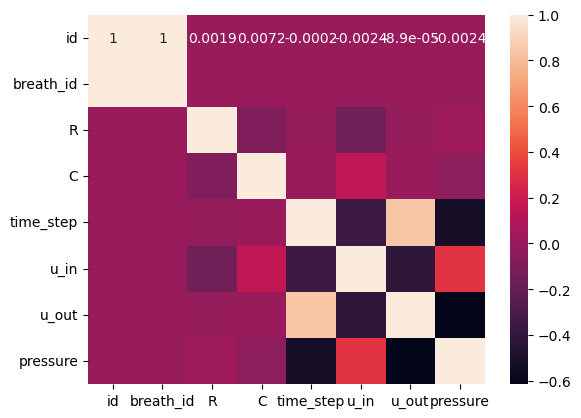

In [8]:
# plot a heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
#drop the id column, breath_id column and R column
df.drop(['id', 'breath_id', 'R'], axis=1, inplace=True)
df.head()

,C,time_step,u_in,u_out,pressure
0,50,0.000000,0.083334,0,5.837492
1,50,0.033652,18.383041,0,5.907794
2,50,0.067514,22.509278,0,7.876254
3,50,0.101542,22.808822,0,11.742872
4,50,0.135756,25.355850,0,12.234987


In [10]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X = df.drop('pressure', axis=1)
y = df['pressure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((4828800, 4), (1207200, 4))

In [11]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X = df.drop('pressure', axis=1)
y = df['pressure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((4828800, 4), (1207200, 4))

In [12]:
# train the model using multiple models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# use random forest as the model
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Random Forest RMSE: {rmse:.4f}')


In [ ]:
# create a model using neural network
